## Programming Languages Demand

----------
### Introduction

- Objectives: 
 - Provide graphs showing the number of offers listing the specific language in the offer title.
 - Provide selectable levels of aggregation: week, month. Upon testing the weekly counts were determied to be too wildly variant, so either a running average has to be used or the monthly values.
 - Provide a Jupyter Workbook Widget to switch between the aggregation levels.

### Methodology

- To produce correct counts POSIX Regular Expressions matching was used. 
https://www.postgresql.org/docs/9.3/functions-matching.html

### Prototyping

Using `matplotlib` to prepare the necessary data and confirm it is suitable for plotting.

In [1]:
import datetime
import psycopg2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets as widgets
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline

%matplotlib notebook
%matplotlib inline

from nbstyler import STYLE

In [15]:
conn = psycopg2.connect("dbname=jobsbg")
week_df = pd.read_sql_query('SELECT * FROM v_programming_lang_demand_weekly', conn, index_col='week_ts')
month_df = pd.read_sql_query('SELECT * FROM v_programming_lang_demand_monthly', conn, index_col='month_ts')

week_df = week_df[1:-1]
month_df = month_df[1:-1]

week_df.index = pd.to_datetime(week_df.index)
month_df.index = pd.to_datetime(month_df.index)

In [19]:
cols_to_plot = ['java_count', 'php_count', 'js_count', 'cplusplus_count', 'python_count', 'csharp_count']

week_df = week_df[cols_to_plot]
month_df = month_df[cols_to_plot]


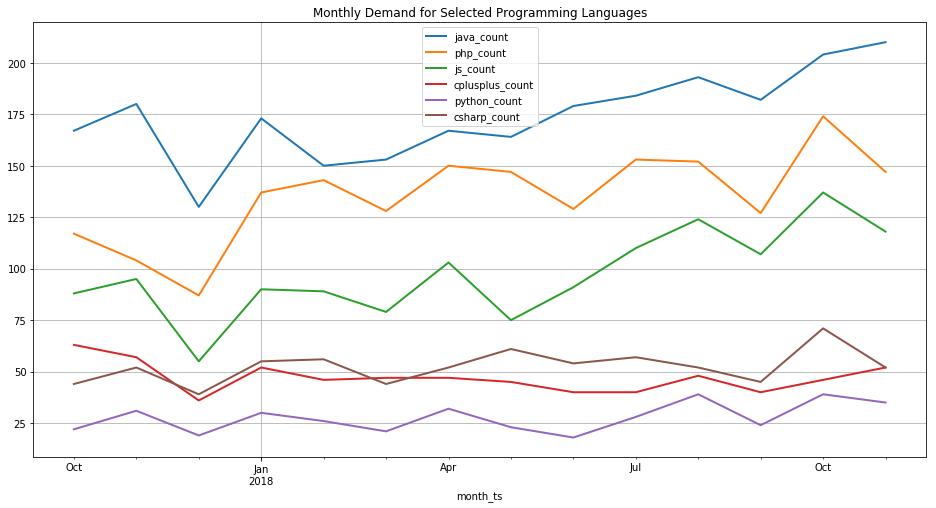

In [20]:
cnt_month.plot(
    title='Monthly Demand for Selected Programming Languages',
    y=cols_to_plot,
    kind='line',
    grid=True,
    linewidth=2,
    figsize=(16,8)
)

### Implementing the Chart in Plotly

In [22]:
traces = []
annotations = []
month_df.columns = ['Java', 'PHP', 'JavaScript', 'C++', 'Python', 'C#']
y_data = [list(month_df[lang].values) for lang in month_df.columns]

In [24]:
x_data = [list(month_df.index)]

In [25]:
for lang in month_df.columns:
    traces.append(go.Scatter(
        x = month_df.index,
        y = month_df[lang].values,
        mode = 'lines',
        line = dict(
            shape = 'linear',
        ),
        hoverinfo = 'y',
    ))


In [30]:
layout = go.Layout(
    width = 920,
    height = 600,
    paper_bgcolor = '#1c3b56',            
    plot_bgcolor = '#1c3b56',
    font = dict(
        color = STYLE['colors']['solid']['fg2'],
        family = STYLE['fonts']['default']['family'],
        size = STYLE['fonts']['default']['size'],
    ),
    title = 'Languages Appearance in Job Offer Titles',
    titlefont = dict(
        color = STYLE['colors']['solid']['fg2'],
        family = STYLE['fonts']['titlefont']['family'],
        size = STYLE['fonts']['titlefont']['size'],
    ),    
    xaxis = dict(
        showline = True,
        showgrid = False,
        showticklabels = True,
        linecolor = STYLE['colors']['solid']['acc4'],
        linewidth = 2,
    ),
    yaxis = dict(
        showgrid = True,
        zeroline = False,
        showline = False,
        showticklabels = False,
    ),
    autosize = False,
    margin = dict(
        autoexpand = False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend = False
)

In [31]:
colors = [
    STYLE['colors']['solid']['acc1'], 
    STYLE['colors']['solid']['acc2'], 
    STYLE['colors']['solid']['acc3'],
    STYLE['colors']['solid']['acc4'],
    STYLE['colors']['solid']['acc5'],
    'red','maroon', 'purple']

for y_trace, label, color in zip(y_data, cnt_month.columns, colors):
    # Create labels for the left hand side
    annotations.append(dict(
        xref = 'paper',
        x = 0,
        y = y_trace[0],
        xanchor = 'right',
        yanchor = 'middle',
        text = label,
        font = dict(
            family = STYLE['fonts']['default']['family'],
            size = STYLE['fonts']['default']['size'],),
        showarrow = False),
    )


In [32]:
layout['annotations'] = annotations

fig = go.Figure(data = traces, layout = layout)

plotly.offline.iplot(fig, filename = 'programming_lang_demand.html')

# Uncomment the line below to export an HTML version of the chart.
# plotly.offline.plot(fig, filename = 'programming_lang_demand.html')

In [29]:
from IPython.core.display import HTML
with open('../resources/styles/python_style.css', 'r') as f:
    style = f.read()
HTML(style)